In [1]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

      Lab    T       a    W      B      b    da    Kjc     ys      e   klim  \
0    GKSS -154   14.47   25   12.5  10.53  0.00   54.8  674.5  237.6  237.2   
1    GKSS -154   14.17   25   12.5  10.83  0.00   49.8  674.5  237.6  240.5   
2    GKSS -154   14.15   25   12.5  10.85  0.00   37.8  674.5  237.6  240.8   
3    GKSS -154   14.36   25   12.5  10.64  0.00   33.0  674.5  237.6  238.4   
4    GKSS -154   14.06   25   12.5  10.94  0.00   38.9  674.5  237.6  241.8   
..    ...  ...     ...  ...    ...    ...   ...    ...    ...    ...    ...   
641  GKSS    0  113.65  200  100.0  86.35  0.41  307.6  473.3  227.5  556.7   
642  GKSS    0  111.81  200  100.0  88.19  0.81  383.0  473.3  227.5  562.6   
643  GKSS    0  113.63  200  100.0  86.37  0.57  332.6  473.3  227.5  556.8   
644  GKSS    0  112.54  200  100.0  87.46  0.00  223.6  473.3  227.5  560.3   
645  GKSS    0  111.92  200  100.0  88.08  1.16  442.2  473.3  227.5  562.2   

    data  kjc1T  
0    YES   54.8  
1    YES   49.8

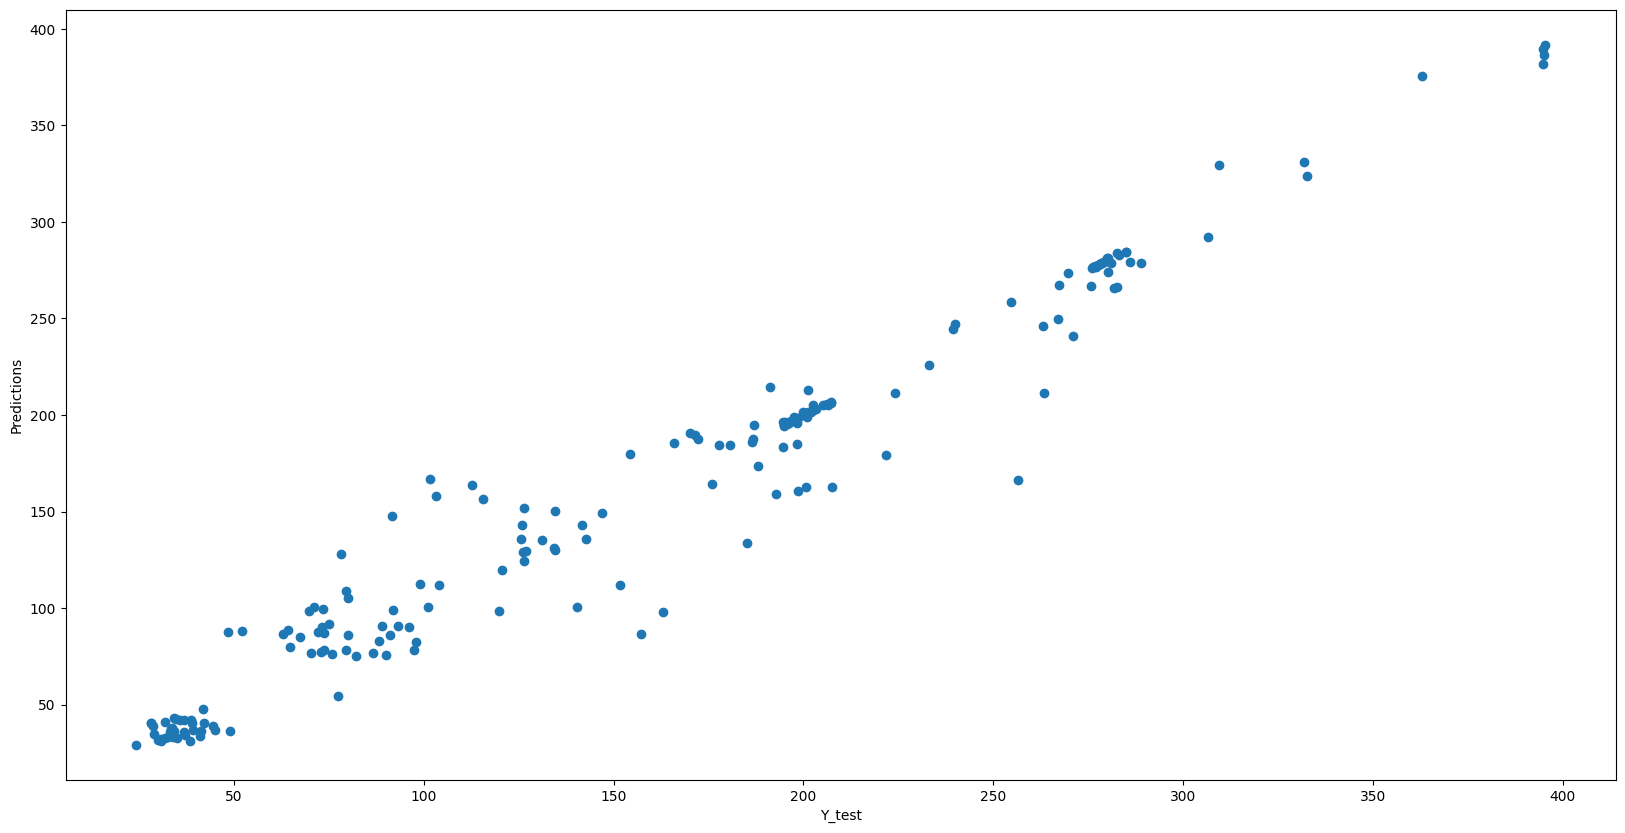

In [4]:
#including all values in the dataset

df=pd.read_excel('SCKCEN Dataset -2.xlsx')

df.dropna(inplace=True)

print(df)

#dropping not useful columns using random forest regressor

X=df.drop(['Kjc','klim','data','Lab','kjc1T'],axis=1)
y=df['kjc1T']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

rf=RandomForestRegressor()

rf.fit(X_train,y_train)

predictions=rf.predict(X_test)

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)
rms=math.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rms}')

plt.figure(figsize=(20,10))

plt.scatter(y_test,predictions)
plt.xlabel('Y_test')
plt.ylabel('Predictions')
plt.savefig('Y_testVSPredictions.png',dpi=100)

In [5]:
#combining all the test dataset
df1=pd.DataFrame({'Y-test':np.array(y_test.values),'predictions':np.array(predictions)})

print("DF1")
print(df1)

print("DF2")
df2=X_test
print(df2)

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

df3 = pd.concat( [df1, df2], axis=1)

print("CONCATENATED")
print(df3)

df3.rename(columns={"Y-test": "trueValue"},inplace=True)

DF1
     Y-test  predictions
0     103.1   158.042000
1     202.4   202.535000
2      38.6    42.104000
3      82.0    75.046000
4     126.1   128.810000
..      ...          ...
189   263.2   245.940000
190   200.9   200.532000
191    97.5    78.515000
192   278.0   278.049000
193    64.8    80.072042

[194 rows x 2 columns]
DF2
       T      a    W     B      b    da     ys      e
355  -40  26.62   50  25.0  23.38  0.05  492.0  230.1
554    0  13.59   25  12.5  11.41  2.57  473.3  227.5
26  -154  13.21   25  12.5  11.79  0.00  674.5  237.6
236  -91  56.26  100  50.0  43.74  0.00  538.9  233.5
208  -91  27.91   50  25.0  22.09  0.04  538.9  233.5
..   ...    ...  ...   ...    ...   ...    ...    ...
452  -20  29.06   50  25.0  20.94  0.26  481.3  228.8
409  -20  14.01   25  12.5  10.99  2.40  481.3  228.8
218  -91  28.64   50  25.0  21.36  0.00  538.9  233.5
584    0  28.46   50  25.0  21.54  4.94  473.3  227.5
137 -110  14.46   25  12.5  10.54  0.00  567.6  234.7

[194 rows x 8 colum

In [6]:
#function to plot at a particular temperature with the given database


def plotatTemp(df,name,temp=math.nan,f1=18,f2=12,tosave=True):
    df10=df

    if(not math.isnan(temp)):
        df10=df10[df['T']==temp]
        print(df10)
    mse=mean_squared_error(df10['trueValue'],df10['predictions'])
    mae=mean_absolute_error(df10['trueValue'],df10['predictions'])
    r2=r2_score(df10['trueValue'],df10['predictions'])
    rms=math.sqrt(mse)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R2 Score: {r2}')
    print(f'Root Mean Squared Error: {rms}')

    sh=df10.shape
    plt.figure(figsize=(f1,f2))
    plt.plot(range(0,sh[0]),df10['trueValue'],label='trueValue')
    plt.plot(range(0,sh[0]),df10['predictions'],label='predictions')
    plt.plot(range(0,sh[0]),df10['predictions']-df10['trueValue'],label='error[predictions-true]',color='red')
    for x in range(0,sh[0]):
        plt.annotate(math.floor(df10['predictions'].tolist()[x]-df10['trueValue'].tolist()[x]),(x,df10['predictions'].tolist()[x]-df10['trueValue'].tolist()[x]))
    for x in range(0,sh[0]):
        plt.annotate(math.floor(df10['predictions'].tolist()[x]),(x,df10['predictions'].tolist()[x]))
    plt.legend()
    plt.title(name)
    if(tosave):
        plt.savefig('output/'+name,dpi=200)
    return

     trueValue  predictions  T       a    W      B      b    da     ys      e
1        202.4      202.535  0   13.59   25   12.5  11.41  2.57  473.3  227.5
7        278.2      278.151  0   28.44   50   25.0  21.56  4.18  473.3  227.5
8        279.1      279.320  0   28.30   50   25.0  21.70  4.87  473.3  227.5
9        395.4      391.768  0   56.43  100   50.0  43.57  3.05  473.3  227.5
10       196.3      196.448  0   14.26   25   12.5  10.74  2.53  473.3  227.5
15       395.2      386.342  0   56.49  100   50.0  43.51  2.50  473.3  227.5
27       332.6      323.559  0  113.63  200  100.0  86.37  0.57  473.3  227.5
32       275.9      275.987  0   28.79   50   25.0  21.21  4.57  473.3  227.5
36       362.9      375.324  0   56.42  100   50.0  43.58  0.78  473.3  227.5
37       165.8      185.502  0  112.11  200  100.0  87.89  0.07  473.3  227.5
42       263.4      211.154  0   56.75  100   50.0  43.25  0.00  473.3  227.5
56       278.5      278.649  0   28.39   50   25.0  21.61  4.95 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


     trueValue  predictions   T       a    W      B      b    da     ys      e
13       186.7      187.312 -20  112.21  200  100.0  87.79  0.11  481.3  228.8
23       195.0      194.196 -20   14.64   25   12.5  10.36  2.38  481.3  228.8
31       198.3      198.107 -20   14.29   25   12.5  10.71  1.05  481.3  228.8
33       146.9      149.428 -20   13.93   25   12.5  11.07  0.00  481.3  228.8
38       269.6      273.385 -20   28.84   50   25.0  21.16  0.35  481.3  228.8
40       196.2      195.932 -20   14.51   25   12.5  10.49  2.58  481.3  228.8
43       187.9      173.603 -20   28.02   50   25.0  21.98  0.00  481.3  228.8
48       280.3      274.298 -20   28.60   50   25.0  21.40  0.35  481.3  228.8
71       198.1      197.755 -20   14.31   25   12.5  10.69  2.51  481.3  228.8
72       200.6      200.645 -20   14.04   25   12.5  10.96  0.74  481.3  228.8
74       233.2      225.656 -20   28.68   50   25.0  21.32  0.16  481.3  228.8
81       200.6      199.556 -20   56.30  100   50.0 

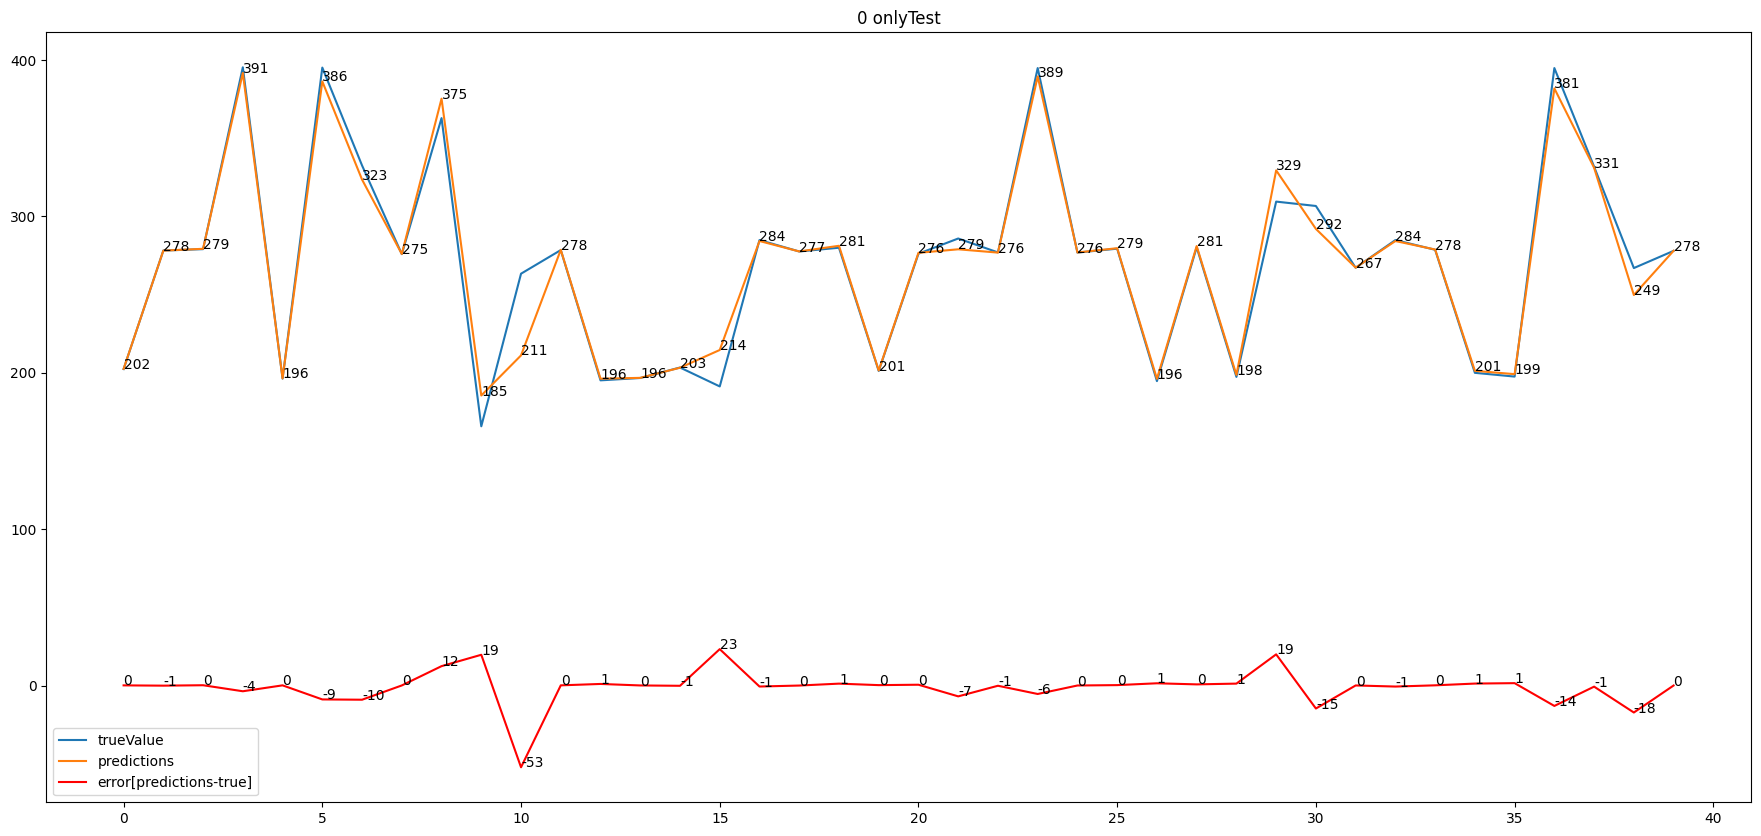

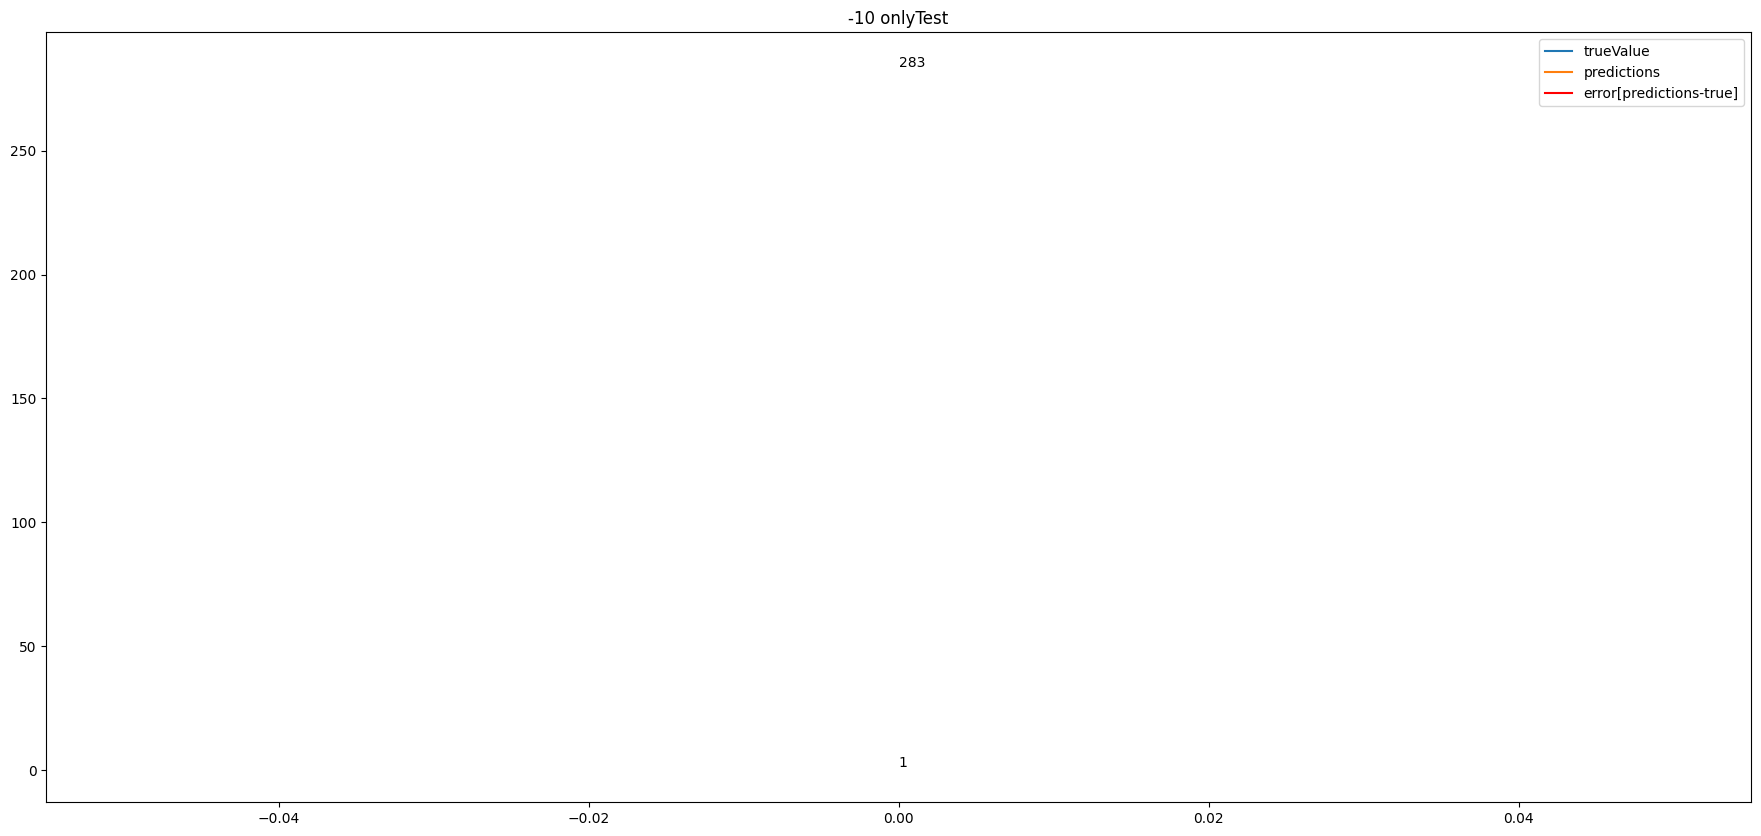

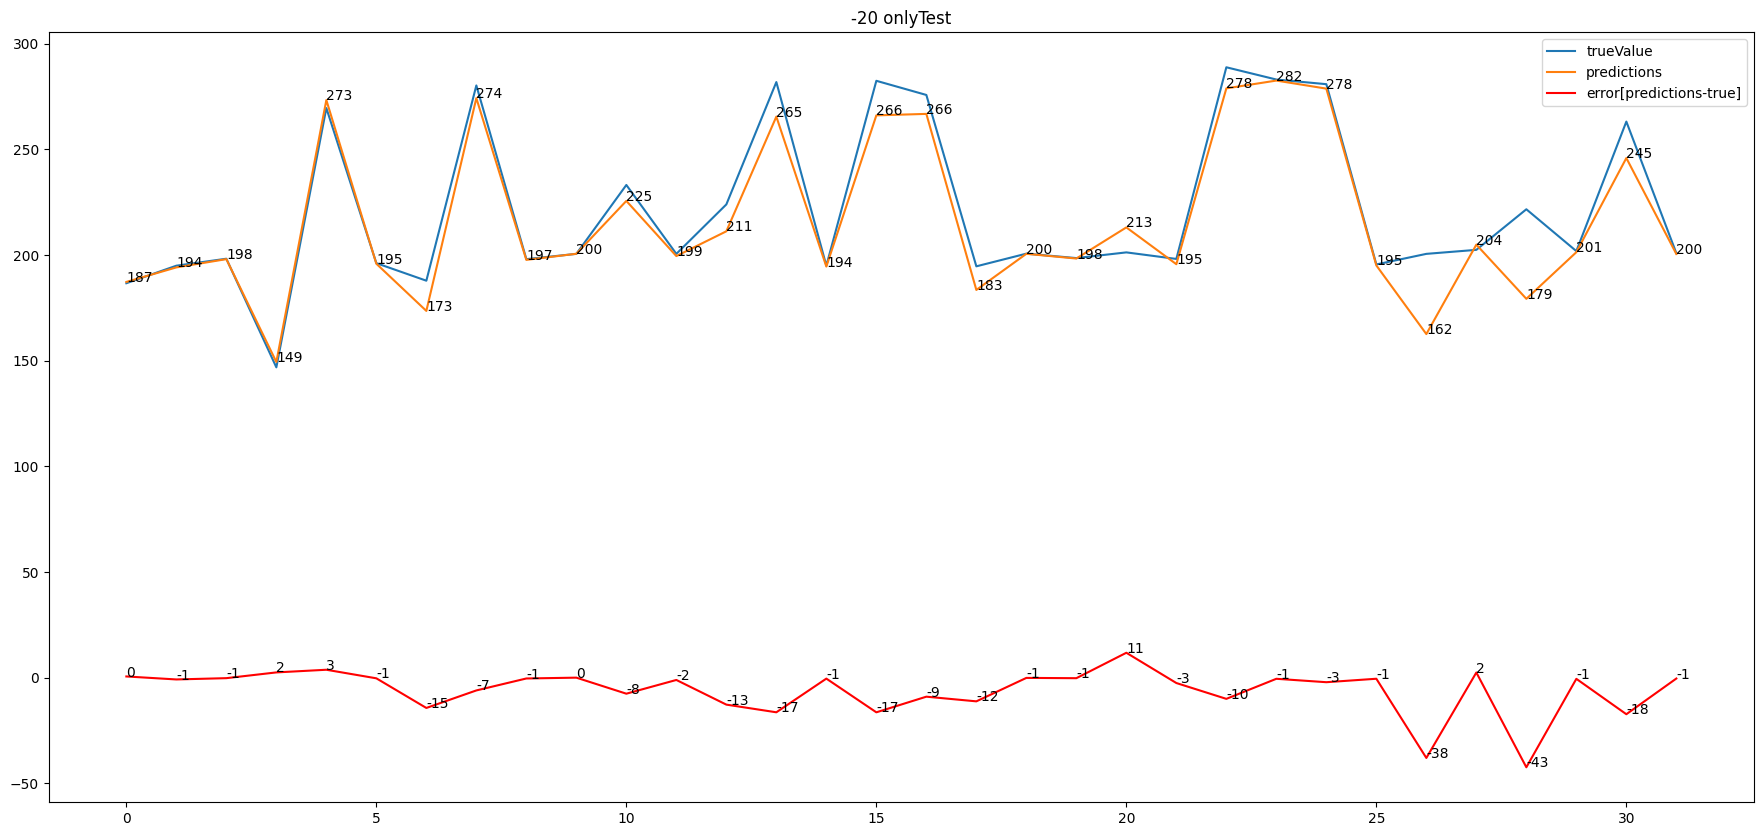

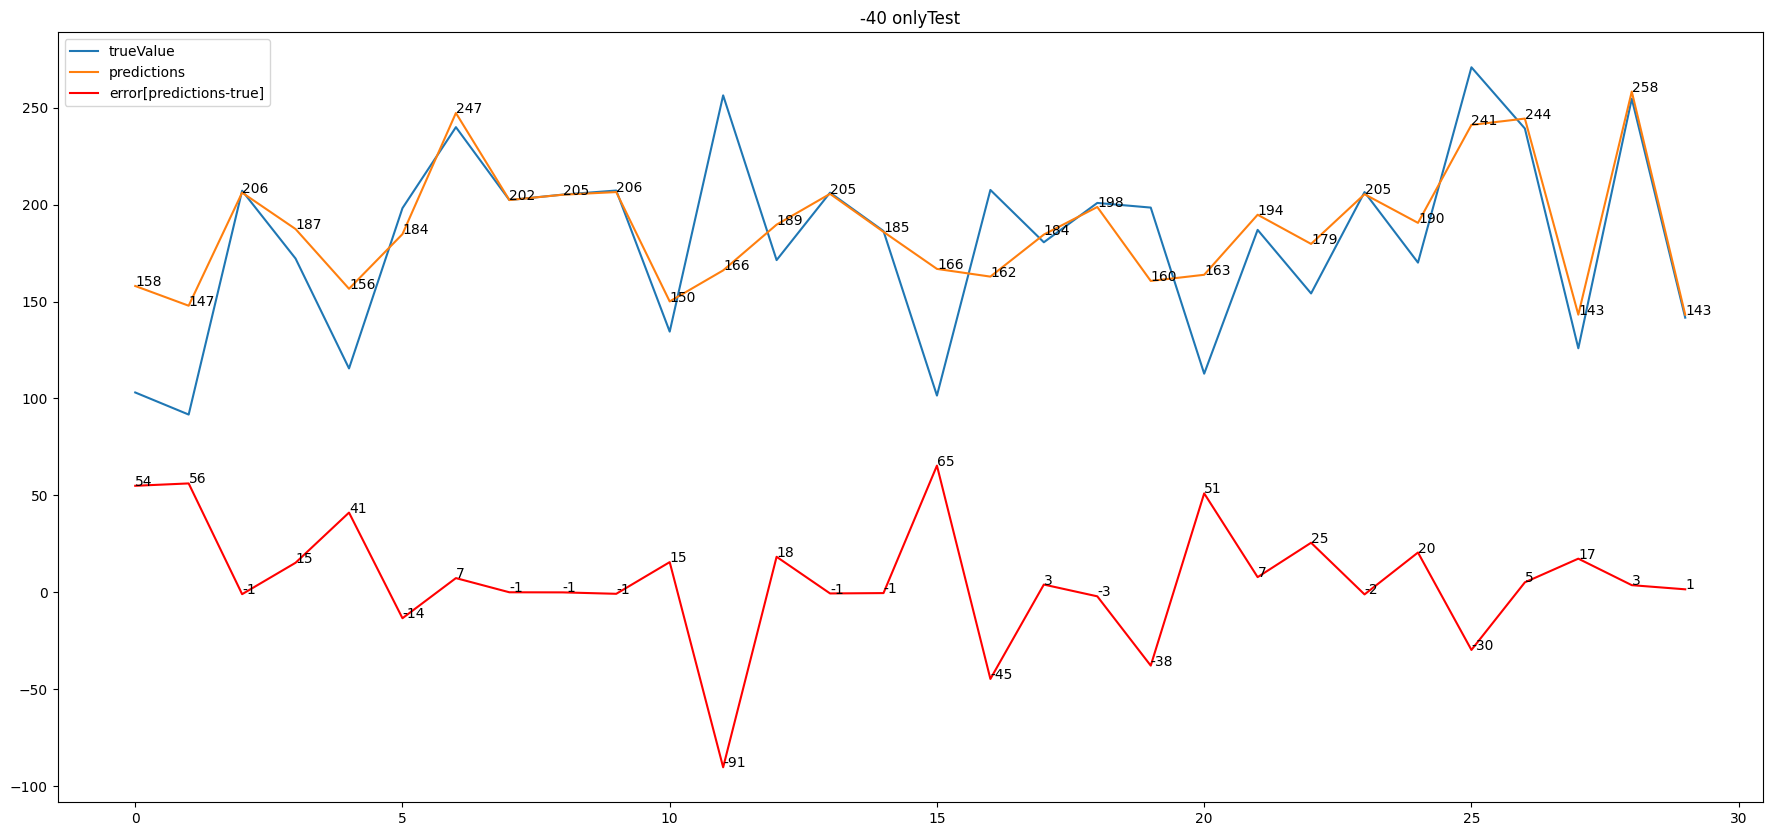

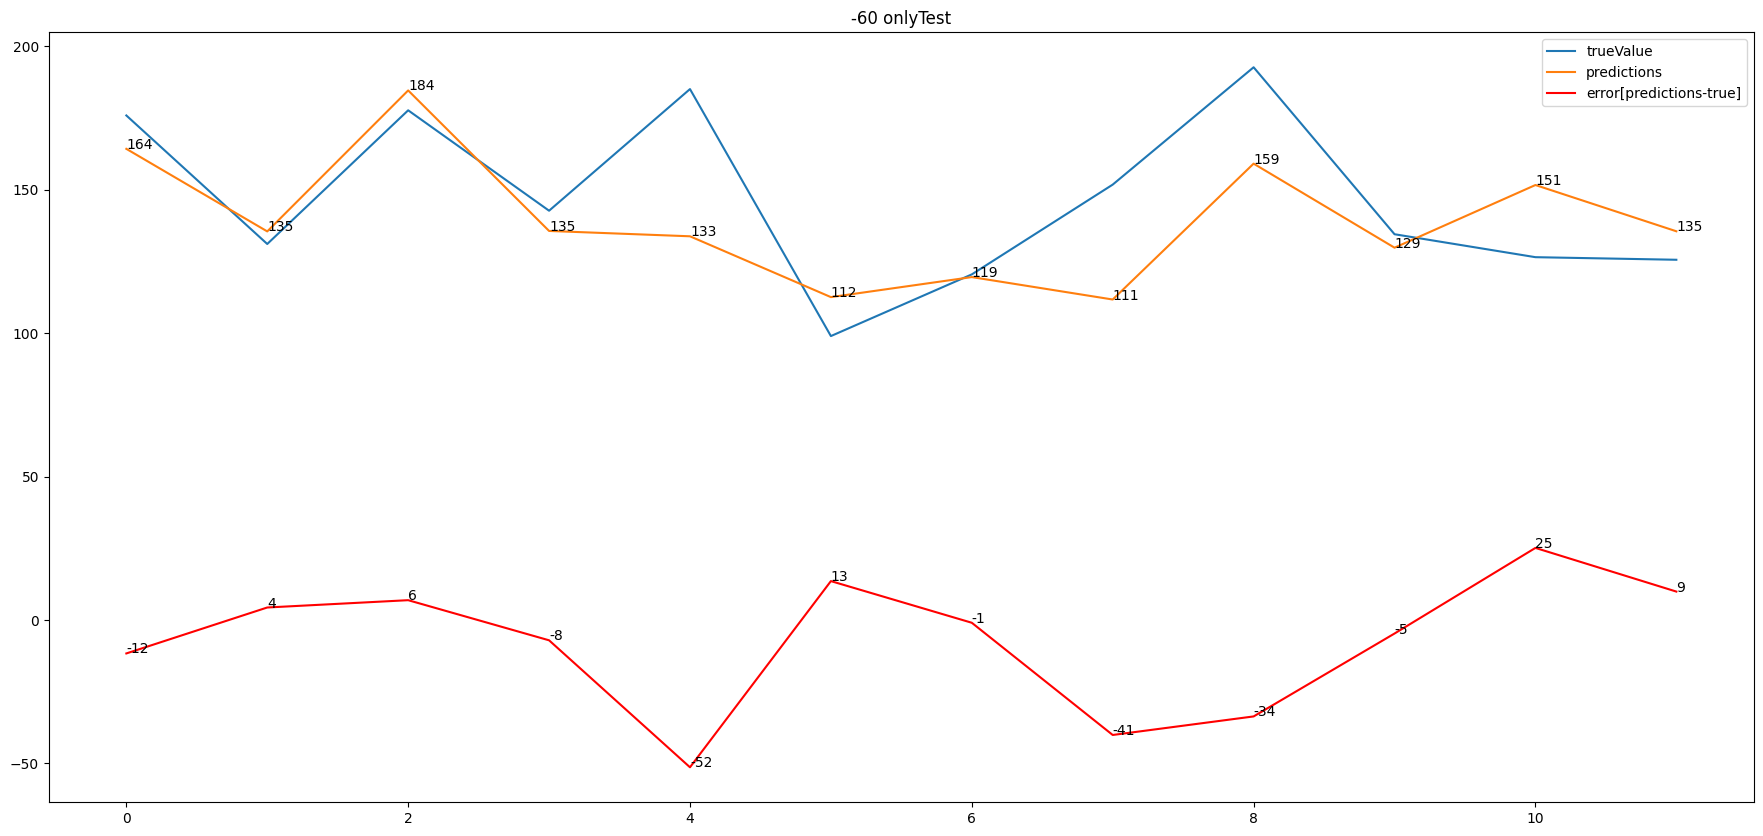

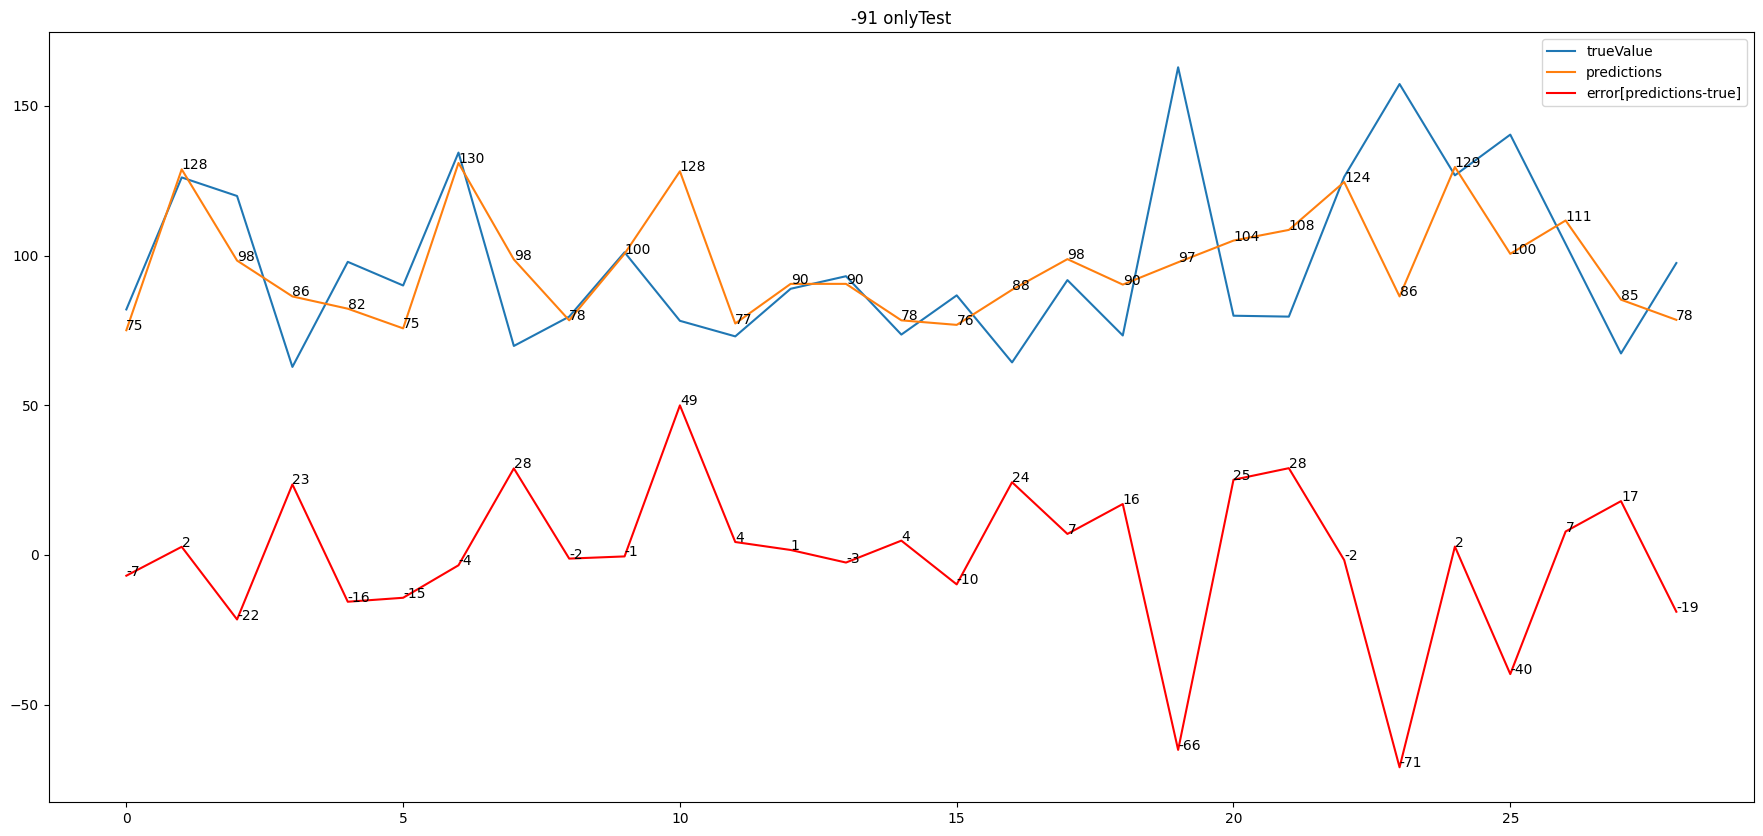

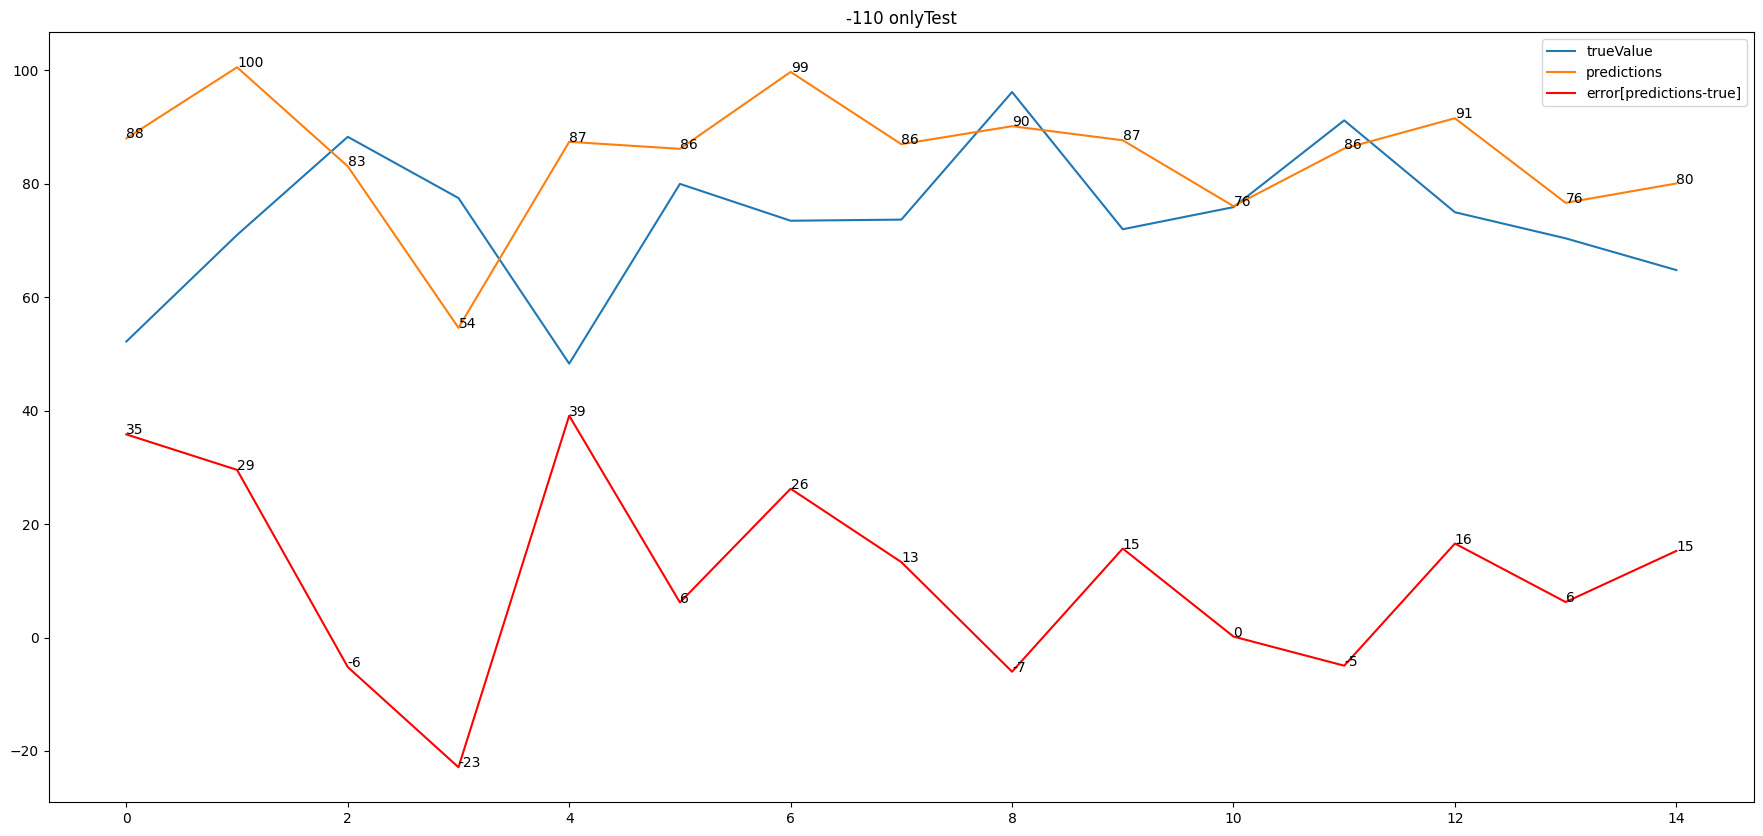

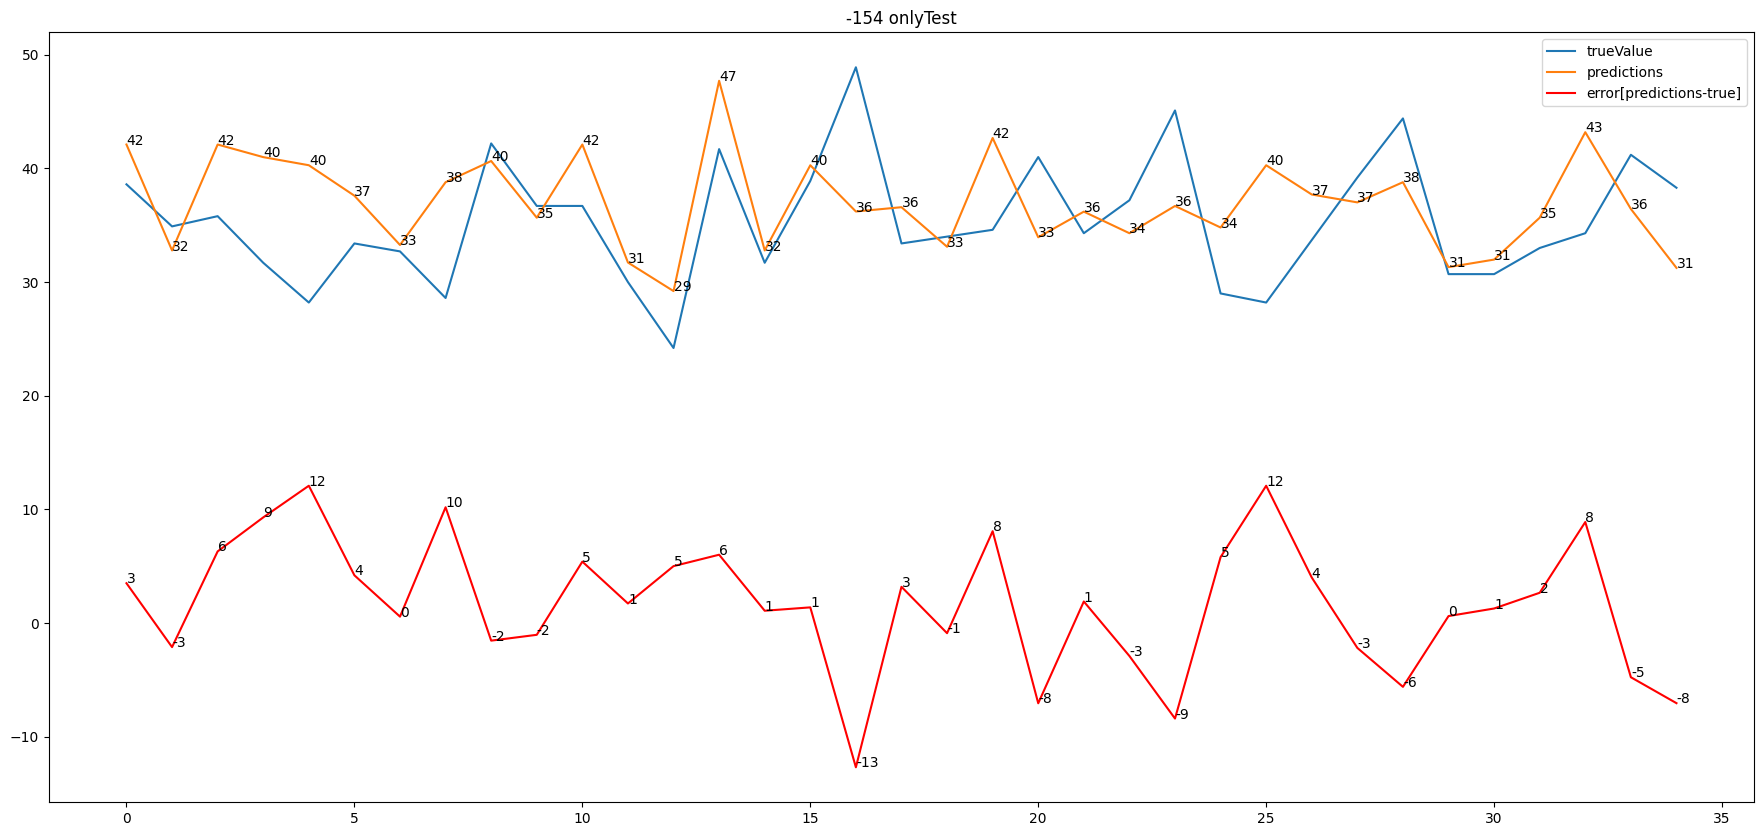

In [7]:
#plotting for a particular temperature
tempList=[0,-10,-20,-40,-60,-91,-110,-154]
for t in tempList:
    plotatTemp(df3,f'{t} onlyTest',temp=t,f1=22,f2=10,tosave=False)

In [8]:
#MERGING the training and test dataset now

predictionsOnTrain=rf.predict(X_train)

print("TRAINING DATASET")

df4=X_train
print("X_TRAIN\n\n")
print(df4)
df5=y_train
print("Y_TRAIN\n\n")
print(df5)

df6=pd.DataFrame({'Y-test':np.array(y_train.values),'predictions':np.array(predictionsOnTrain)})

df4.reset_index(drop=True, inplace=True)
df6.reset_index(drop=True, inplace=True)

df7 = pd.concat( [df4, df6], axis=1)

print("\n\nTrain  Concatenated\n\n")

print(df7)

df8=pd.concat([df7,df3])
df8.reset_index(drop=True,inplace=True)

df8.rename(columns={"Y-test": "trueValue"},inplace=True)

print("Training and Test Merged\n\n")

print(df8)

#df8.to_excel('Output/predicted_Values.xlsx',sheet_name='Sheet1')

TRAINING DATASET
X_TRAIN


       T      a    W     B      b    da     ys      e
191  -91  27.33   50  25.0  22.67  0.00  538.9  233.5
474  -20  29.42   50  25.0  20.58  0.25  481.3  228.8
252  -91  56.49  100  50.0  43.51  0.00  538.9  233.5
210  -91  27.73   50  25.0  22.27  0.00  538.9  233.5
300  -60  27.59   50  25.0  22.41  0.09  506.4  231.4
..   ...    ...  ...   ...    ...   ...    ...    ...
14  -154  13.11   25  12.5  11.89  0.00  674.5  237.6
314  -40  13.61   25  12.5  11.39  0.60  492.0  230.1
385  -40  56.29  100  50.0  43.71  0.15  492.0  230.1
251  -91  56.51  100  50.0  43.49  0.00  538.9  233.5
422  -20  14.30   25  12.5  10.70  1.07  481.3  228.8

[452 rows x 8 columns]
Y_TRAIN


191     55.9
474    241.6
252     98.9
210    111.4
300    163.6
       ...  
14      35.2
314    207.3
385    198.0
251     64.2
422    198.2
Name: kjc1T, Length: 452, dtype: float64


Train  Concatenated


       T      a    W     B      b    da     ys      e  Y-test  predictions
0    -91

In [9]:
#function to calculate residual standard error take parameters true value and predicted value
def RSE(y_true, y_predicted):
    """
    - y_true: Actual values
    - y_predicted: Predicted values
    """
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

# New Section